In [4]:
from google.colab import files
files.upload()

Saving 7b9447c625cf11eb.zip to 7b9447c625cf11eb.zip


{'7b9447c625cf11eb.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x009yfQ\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00 \x00dataset/UT\r\x00\x07\xe7\x19\xa5_\xff\x19\xa5_\xe7\x19\xa5_ux\x0b\x00\x01\x04\xe8\x03\x00\x00\x04\xe8\x03\x00\x00PK\x03\x04\x14\x00\x08\x00\x08\x00\xe5xfQ\x00\x00\x00\x00\x00\x00\x00\x00)\xb8\n\x00\x11\x00 \x00dataset/train.csvUT\r\x00\x07G\x19\xa5_G\x19\xa5_G\x19\xa5_ux\x0b\x00\x01\x04\xe8\x03\x00\x00\x04\xe8\x03\x00\x00t\xbd\xdbr\xe3\xd6\x92-\xfa\xae\xaf\xf0\xcb\x898\'\x82K\x01\xcc;\xea\x8d\x00q1X\xa4I\x827\xe0\xc5A\x97\xb8\\\\VI+$\x95\xbb\xe5\xaf?y\x99\x00\x01\x90\x1d\xbb\xdbe{\xb7\x05M`f\xe6\xc8\xcc\x91#Wo\xafO?\xbf}\xfc~y\x9aT\x1f\xa7\xe7\xe7\xdf_^\'\x97\x97\xf7\x8f\xd7o\x7f\xfd\xfet\xfa8O\x16\xa7\xb7\xbf\xce\x1f\xbf\'\xf0\xf7\x7f\xbe\xbe}N\x92\x9f\xf0\xff\xf9\xe3\xfc\xf6\xfb\xcb\xe9\xc7y\xf2\xf5\xf5\xf3\xf4\xfc\xf1\xf9\xfb7\xffo\'+\xff\xf3\xba\xff\xfb\xfc\xed\xf4t\x9e\xcc\xce?N/O\x93\xd9\xe5\xfd\xdb\xeb\xcf\x97\x8f\xdfO\x7f\x9f.\xcf\x93o\xdfOo\x7f\x9e\xdf\

In [72]:
#!ls dataset
import matplotlib.pyplot as plt



sample_submission.csv  test.csv  train.csv


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

import pandas as pd


## Loading dataset 
DataFrame = pd.read_csv('./dataset/train.csv')
TestFrame = pd.read_csv('./dataset/test.csv')
TestNames = np.array(TestFrame['Product_id'])
## preprocessing
DataFrame = DataFrame.fillna(method='ffill')
TestFrame = TestFrame.fillna(method='ffill')

## Prices and test labels
Prices = np.array(DataFrame['Selling_Price'], dtype = 'float32')


DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6368 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6368 non-null   float64
 10  charges_1         6368 non-null   float64
 11  charges_2 (%)     6368 non-null   float64
 12  Minimum_price     6368 non-null   float64
 13  Maximum_price     6368 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [114]:
 featuresRequired  =     [ 'Stall_no', 'Market_Category', 'Loyalty_customer', 'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
                           'charges_2 (%)', 'Minimum_price', 'Maximum_price']
featureNeedsMapping  = [ 'Loyalty_customer', 'Product_Category']


DataFrame = DataFrame[featuresRequired]
TestFrame = TestFrame[featuresRequired]

In [115]:
def mapperFunction():
  for mem in featureNeedsMapping:
    uniqueVals = set(DataFrame[mem])
    mp1 = {}
    
    i = 0
    for member in uniqueVals:
      mp1[member] = i
      i += 1
    
    DataFrame[mem] = DataFrame[mem].map(mp1)
    TestFrame[mem] = TestFrame[mem].map(mp1)


In [116]:
mapperFunction()

In [112]:
## Getting Testing and Training vectors
TrainVector = np.array(DataFrame[featuresRequired], dtype= 'float32')
TestVector = np.array(TestFrame[featuresRequired], dtype= 'float32')

## FeatureVectorScalling
stdSc = StandardScaler()
TrainVector = stdSc.fit_transform(TrainVector)
TestVector = stdSc.transform(TestVector)

In [117]:
## label scalling
MaxPrice = max(Prices)
Prices = Prices/MaxPrice

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(TrainVector, Prices, test_size = 0.05, random_state = 42)

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [138]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(xtrain, ytrain)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [119]:
def AccuracyPlotter(trueLabels, predictedLabels):
  size = len(trueLabels)
  x_y = [0.00, 0.001, 0.002]


  
  plt.scatter(trueLabels, predictedLabels)
  #plt.plot(x_y)
  plt.show()

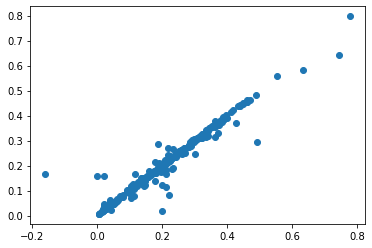

In [139]:
AccuracyPlotter(ytest, br.predict(xtest))

In [140]:
def Predictor(i = 0):
  PredictedPrices = (gbr.predict(TestVector) + rfr.predict(TestVector)+ br.predict(TestVector)) / 3
  PredictedPrices = PredictedPrices * MaxPrice
  PredictedPrices[ PredictedPrices < 0] = 0

  Frame = {'Product_id' : TestNames,
           'Selling_Price' : PredictedPrices }

  Frame = pd.DataFrame(Frame)
  Frame.to_csv(str(i) + '.csv', index = False)


In [141]:
Predictor('submission6')